In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.hermite import hermgauss

def g(x):
    return np.cos(x/2)*(x/2)**2
    
n = 16  # number of points
x_i, w_i = hermgauss(n)

# evaluate (note the additional square-root factors needed)
f = (1. / np.sqrt(np.pi)) * np.sum(w_i * g(np.sqrt(2.0) * x_i))

In [2]:
# calc trapezoid approx
def normpdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

rx = np.linspace(-10, 10,10000)
dx = np.mean(np.diff(rx))

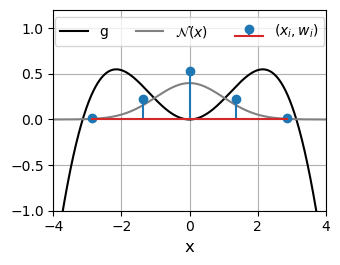

In [3]:
n_plot = 5
x_i, w_i = hermgauss(n_plot)
x_i *= np.sqrt(2)
w_i /= np.sqrt(np.pi)

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.75), tight_layout=True)
ax.plot(rx, g(rx), c='k')
ax.plot(rx, normpdf(rx), c='gray')
ax.stem(x_i, w_i)
ax.set_xlim(-4, 4)
ax.set_ylim(-1, 1.2)
ax.set_xlabel('x', fontsize=12)
ax.legend(['g', r'$\mathcal{N}(x)$', r'$(x_i, w_i)$'], loc='upper center', ncol=3)
ax.grid()

fig.savefig('gauss_hermite_1.png')

In [4]:
# Evaluate the integrand
y = normpdf(rx) * g(rx)

# Trapezoidal integration
itgl_trapz = np.trapezoid(y, rx)

In [5]:
itgl_trapz

np.float64(0.16546816923461163)

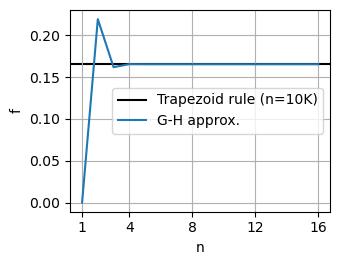

In [8]:
ns = np.arange(1, 17)
fs = []

for n in ns:
    x_i, w_i = hermgauss(n)
    
    # evaluate (note the additional square-root factors needed)
    f = (1. / np.sqrt(np.pi)) * np.sum(w_i * g(np.sqrt(2.0) * x_i))

    fs.append(f)

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.75), tight_layout=True)
ax.axhline(itgl_trapz, c='k', zorder=-1)
ax.plot(ns, fs)
ax.set_xticks([1, 4, 8, 12, 16])
ax.set_xlabel('n')
ax.set_ylabel('f')
ax.legend(['Trapezoid rule (n=10K)', 'G-H approx.'], loc='center right')
ax.grid()

fig.savefig('gauss_hermite_2.png')